# Classification, Resampling

In [145]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost

## Data

In [146]:
# Importing prepared dataset
dfm = pd.read_excel('control-2.xlsx', sheet_name='Вар (19)')

In [147]:
# Cheking Missing data
dfm.isnull().sum()

Успех                              0
Площадь загальна кв.м              0
Этаж                               0
Количество сотрудников в штаті     0
Тип                                0
Кількість відгуків в гуглі        30
Количество чеков в месяц           7
Средний чек                        7
Середній дохід населення           5
Населення середнє                  5
Спеціалізований хліб               0
Спеціалізоване м'ясо               0
Спеціалізований сир                0
Спеціалізована поб. Хімія          0
Супермаркет                        0
dtype: int64

In [148]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()
dfm[['Количество чеков в месяц']] = imputer_mean.fit_transform(dfm[['Количество чеков в месяц']]).round()
dfm[['Средний чек']] = imputer_mean.fit_transform(dfm[['Средний чек']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()
dfm[['Населення середнє']] = imputer_mean.fit_transform(dfm[['Населення середнє']]).round()

In [149]:
# Drop useless
dfm = dfm.drop(['Этаж'], axis='columns', inplace=False)
dfm.head()

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Середній дохід населення,Населення середнє,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет
0,не успішний,9.0,2,Light,43.0,1230.0,77.0,14910.0,3807.0,1,1,1,0,1
1,не успішний,30.0,2,Light,8.0,2715.0,85.0,9030.0,9086.0,0,0,0,0,1
2,не успішний,15.0,2,light,43.0,878.0,112.0,9030.0,6383.0,1,0,0,0,0
3,не успішний,20.0,2,light,43.0,2346.0,120.0,13930.0,4.0,1,1,0,0,1
4,не успішний,30.0,2,light,43.0,2542.0,95.0,14560.0,426.0,0,0,0,0,0


In [150]:
#we need to encode non-numeric data
success = {'не успішний':0,'успішний':1}
dfm['Успех'] = dfm['Успех'].map(success)
type = {'Light':0,'Standart':1, 'light':0, 'Micro':2, 'Premium': 3}
dfm['Тип'] = dfm['Тип'].map(type)

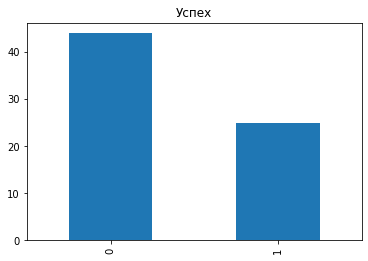

In [151]:
dfm['Успех'].value_counts().plot(kind='bar', title='Успех');

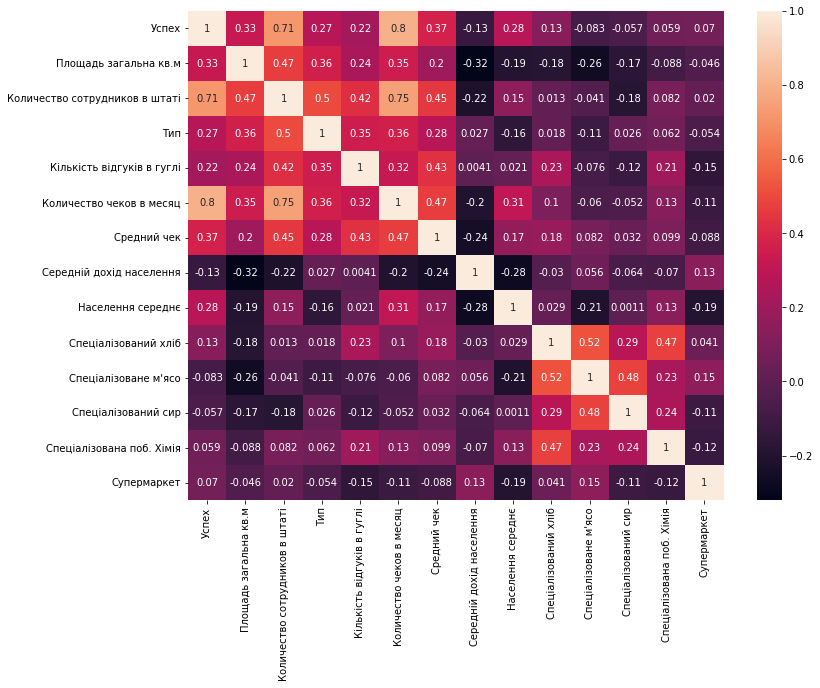

In [152]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Splitting

In [153]:
col = ['Успех','Средний чек','Середній дохід населення']
from sklearn.model_selection import train_test_split
X = dfm[col]
train, test = train_test_split(X, test_size=0.2, random_state=10)

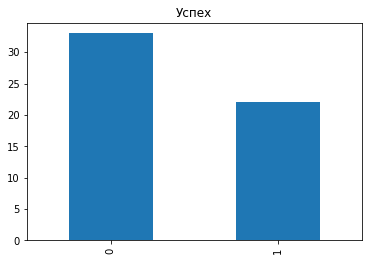

In [154]:
train['Успех'].value_counts().plot(kind='bar', title='Успех');

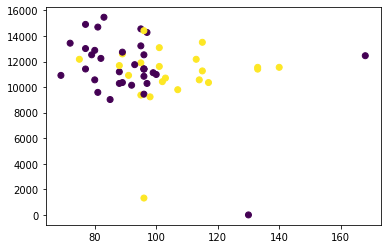

In [155]:
x = train['Средний чек']          #  x - координаты точек
y = train['Середній дохід населення']    #  y - координаты точек
z = train['Успех']                             #  z - цвет точек

fig, ax = plt.subplots()
ax.scatter(x, y, c = z)    

In [156]:
train['target'] = train['Успех']
train.drop(['Успех'], axis='columns', inplace=True)

In [157]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
class_0 = train[train['target'] == 0]
class_1 = train[train['target'] == 1]

## Random under-sampling

Random under-sampling:
0    22
1    22
Name: target, dtype: int64


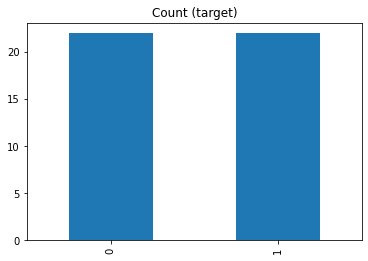

In [158]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(test_under.target.value_counts())

test_under.target.value_counts().plot(kind='bar', title='Count (target)');

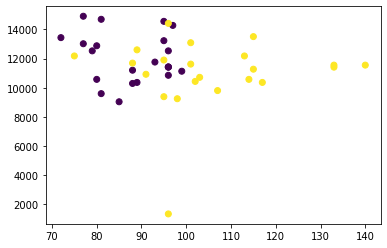

In [159]:
x1 = test_under['Средний чек']       
y1 = test_under['Середній дохід населення']  
z1 = test_under.target

fig, ax = plt.subplots()
ax.scatter(x1, y1, c = z1)

## Random over-sampling

Random over-sampling:
0    33
1    33
Name: target, dtype: int64


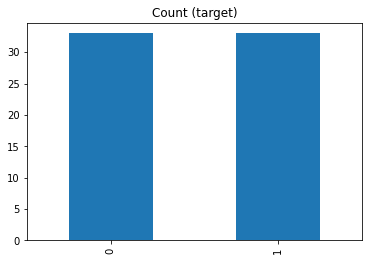

In [160]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(test_over.target.value_counts())

test_over.target.value_counts().plot(kind='bar', title='Count (target)');

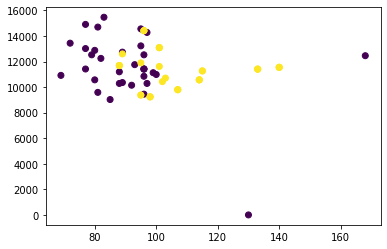

In [161]:
x2 = test_over['Средний чек']       
y2 = test_over['Середній дохід населення']  
z2 = test_over.target

fig, ax = plt.subplots()
ax.scatter(x2, y2, c = z2)

## Imbalanced-learn module

In [162]:
X_col = ['Средний чек','Середній дохід населення']
X = train[X_col]
y = train.target
y.value_counts()

0    33
1    22
Name: target, dtype: int64

In [163]:
#!pip install imblearn

### Under

In [164]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print(y_rus.value_counts())

0    22
1    22
Name: target, dtype: int64


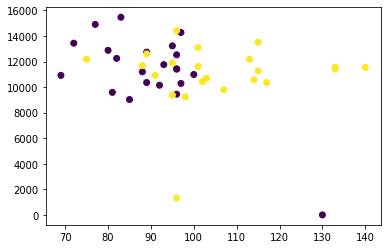

In [165]:
x3 = X_rus['Средний чек']       
y3 = X_rus['Середній дохід населення']  
z3 = y_rus

fig, ax = plt.subplots()
ax.scatter(x3, y3, c = z3)

### Over

In [166]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print(y_ros.value_counts())


11 new random picked points
0    33
1    33
Name: target, dtype: int64


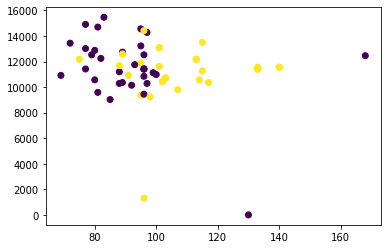

In [167]:
x4 = X_ros['Средний чек']       
y4 = X_ros['Середній дохід населення']  
z4 = y_ros

fig, ax = plt.subplots()
ax.scatter(x4, y4, c = z4)

## SMOTE

In [168]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
print(y_sm.value_counts())

0    33
1    33
Name: target, dtype: int64


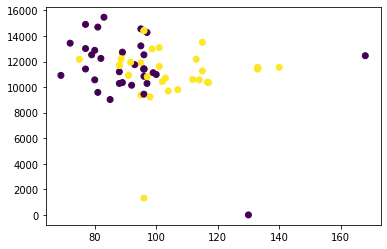

In [169]:
x5 = X_sm['Средний чек']       
y5 = X_sm['Середній дохід населення']  
z5 = y_sm

fig, ax = plt.subplots()
ax.scatter(x5, y5, c = z5)

## Samples

In [170]:
X_train = train[X_col]
y_train = train.target
X_test = test[X_col]
test['target'] = test['Успех']
test.drop(['Успех'], axis='columns', inplace=True)
y_test = test.target

# Tree

## Parameters

In [171]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

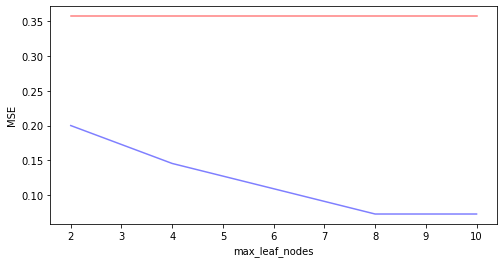

In [172]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

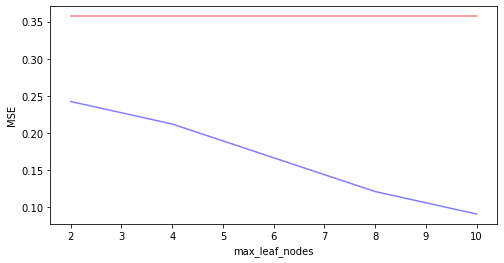

In [173]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_sm, X_test, y_sm, y_test, [2, 4, 6, 8, 10])

## Model (base)

In [190]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 8, criterion = 'entropy', random_state = 10).fit(X_train, y_train)
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_train,y_train), ct.score(X_test,y_test)

(0.8909090909090909, 0.6428571428571429)

In [187]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ct.predict(X_train))
print(cm)

[[33  0]
 [ 6 16]]


In [185]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 3]
 [2 1]]


## Model (resampled)

In [189]:
# Fitting Classification Tree to the Training set (2 variables)
ct_r = DecisionTreeClassifier(max_leaf_nodes = 8, criterion = 'entropy', random_state = 10).fit(X_sm, y_sm)
# Predicting the Test set results
y_pred_r = ct_r.predict(X_test)
ct_r.score(X_sm,y_sm),ct_r.score(X_test,y_test)

(0.8636363636363636, 0.6428571428571429)

In [188]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_sm, ct.predict(X_sm))
print(cm)

[[33  0]
 [12 21]]


In [186]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_r)
print(cm)

[[8 3]
 [2 1]]
